# Enhancing Manual Software Testing using Supervised Machine Learning

## 🎯 Project Objective
This notebook demonstrates how supervised ML models can be used to assist manual software testers by predicting which modules are likely to have defects, so testers can focus their efforts more effectively.


In [1]:
!pip install pandas scikit-learn matplotlib seaborn

In [4]:
import pandas as pd

# Load the training and testing datasets
train_df = pd.read_csv('/content/Train_data.csv')
test_df = pd.read_csv('/content/Test_data.csv')

# Display the first few rows of each
print("Train Dataset:")
print(train_df.head())

print("\nTest Dataset:")
print(test_df.head())


Train Dataset:
   Index  LOC_BLANK  BRANCH_COUNT  LOC_CODE_AND_COMMENT  LOC_COMMENTS  \
0      0          0             3                     0             0   
1      1          1             1                     0             0   
2      2          0             1                     0             0   
3      3          0             1                     0             2   
4      4          2             3                     1             3   

   CYCLOMATIC_COMPLEXITY  DESIGN_COMPLEXITY  ESSENTIAL_COMPLEXITY  \
0                      2                  2                     1   
1                      1                  1                     1   
2                      1                  1                     1   
3                      1                  1                     1   
4                      2                  2                     1   

   LOC_EXECUTABLE  HALSTEAD_CONTENT  ...  HALSTEAD_LENGTH  HALSTEAD_LEVEL  \
0               5             17.08  ...              

In [5]:
print("Train columns:", train_df.columns)
print("Test columns:", test_df.columns)

# Check for missing values
print(train_df.isnull().sum())
print(test_df.isnull().sum())


Train columns: Index(['Index', 'LOC_BLANK', 'BRANCH_COUNT', 'LOC_CODE_AND_COMMENT',
       'LOC_COMMENTS', 'CYCLOMATIC_COMPLEXITY', 'DESIGN_COMPLEXITY',
       'ESSENTIAL_COMPLEXITY', 'LOC_EXECUTABLE', 'HALSTEAD_CONTENT',
       'HALSTEAD_DIFFICULTY', 'HALSTEAD_EFFORT', 'HALSTEAD_ERROR_EST',
       'HALSTEAD_LENGTH', 'HALSTEAD_LEVEL', 'HALSTEAD_PROG_TIME',
       'HALSTEAD_VOLUME', 'NUM_OPERANDS', 'NUM_OPERATORS',
       'NUM_UNIQUE_OPERANDS', 'NUM_UNIQUE_OPERATORS', 'LOC_TOTAL', 'Defect'],
      dtype='object')
Test columns: Index(['Index', 'LOC_BLANK', 'BRANCH_COUNT', 'LOC_CODE_AND_COMMENT',
       'LOC_COMMENTS', 'CYCLOMATIC_COMPLEXITY', 'DESIGN_COMPLEXITY',
       'ESSENTIAL_COMPLEXITY', 'LOC_EXECUTABLE', 'HALSTEAD_CONTENT',
       'HALSTEAD_DIFFICULTY', 'HALSTEAD_EFFORT', 'HALSTEAD_ERROR_EST',
       'HALSTEAD_LENGTH', 'HALSTEAD_LEVEL', 'HALSTEAD_PROG_TIME',
       'HALSTEAD_VOLUME', 'NUM_OPERANDS', 'NUM_OPERATORS',
       'NUM_UNIQUE_OPERANDS', 'NUM_UNIQUE_OPERATORS', 'LOC_TOTAL'

In [9]:
import pandas as pd

df = pd.read_csv('/content/Train_data.csv')
print(df.columns)


Index(['Index', 'LOC_BLANK', 'BRANCH_COUNT', 'LOC_CODE_AND_COMMENT',
       'LOC_COMMENTS', 'CYCLOMATIC_COMPLEXITY', 'DESIGN_COMPLEXITY',
       'ESSENTIAL_COMPLEXITY', 'LOC_EXECUTABLE', 'HALSTEAD_CONTENT',
       'HALSTEAD_DIFFICULTY', 'HALSTEAD_EFFORT', 'HALSTEAD_ERROR_EST',
       'HALSTEAD_LENGTH', 'HALSTEAD_LEVEL', 'HALSTEAD_PROG_TIME',
       'HALSTEAD_VOLUME', 'NUM_OPERANDS', 'NUM_OPERATORS',
       'NUM_UNIQUE_OPERANDS', 'NUM_UNIQUE_OPERATORS', 'LOC_TOTAL', 'Defect'],
      dtype='object')


In [10]:
# Features and target from training data
X_train = train_df.drop('Defect', axis=1)
y_train = train_df['Defect']


In [11]:
from sklearn.ensemble import RandomForestClassifier

# Initialize model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [12]:
# Predict defect status on test data
predictions = model.predict(test_df)

# Add prediction column to test data
test_df['Predicted_Defect'] = predictions

# Show result
print(test_df.head())


   Index  LOC_BLANK  BRANCH_COUNT  LOC_CODE_AND_COMMENT  LOC_COMMENTS  \
0      0          0             1                     0             0   
1      1          2             3                     0             0   
2      2          1             5                     0             0   
3      3          0             1                     0             0   
4      4          0             1                     0             0   

   CYCLOMATIC_COMPLEXITY  DESIGN_COMPLEXITY  ESSENTIAL_COMPLEXITY  \
0                      1                  1                     1   
1                      2                  2                     1   
2                      3                  3                     1   
3                      1                  1                     1   
4                      1                  1                     1   

   LOC_EXECUTABLE  HALSTEAD_CONTENT  ...  HALSTEAD_LENGTH  HALSTEAD_LEVEL  \
0               0              5.33  ...                4            

In [13]:
test_df.to_csv('test_with_predictions.csv', index=False)


In [14]:
from google.colab import files
files.download('test_with_predictions.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

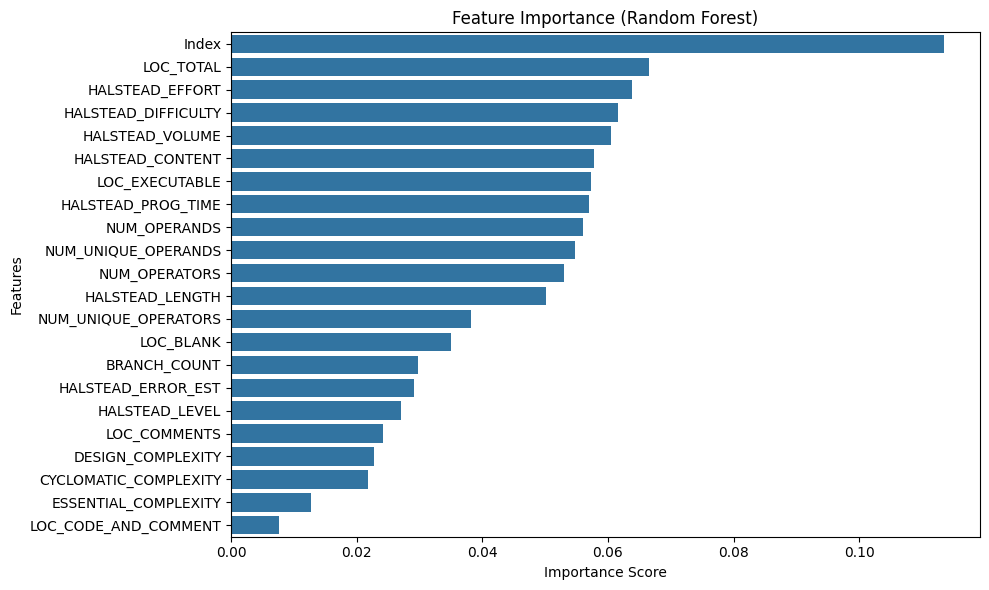

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the trained model
importances = model.feature_importances_
features = X_train.columns

# Create DataFrame
feature_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()
